In [1]:
import yfinance as yf
#import numpy as np
import pandas as pd
#import datetime as dt
#from pandas.tseries.offsets import MonthEnd

In [2]:
df=yf.download('^GSPC',start='2018-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000
...,...,...,...,...,...,...
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000
2023-01-10,3888.570068,3919.830078,3877.290039,3919.250000,3919.250000,3851030000
2023-01-11,3932.350098,3970.070068,3928.540039,3969.610107,3969.610107,4303360000


In [3]:
df1=df.reset_index()['Close']
len(df1)

1268

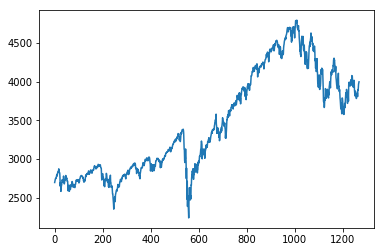

In [4]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [5]:
### LSTM are sensitive to use the scale of the data. so we apply MinMax Scaler

In [6]:
import numpy as np

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.17912523],
       [0.18586572],
       [0.19013663],
       ...,
       [0.67686667],
       [0.68216521],
       [0.68838606]])

In [8]:
df1.shape

(1268, 1)

In [9]:
##splitting datasets into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
train_data

array([[0.17912523],
       [0.18586572],
       [0.19013663],
       [0.19762343],
       [0.19940528],
       [0.20080421],
       [0.19960848],
       [0.20716177],
       [0.21446102],
       [0.21062379],
       [0.22083814],
       [0.21906801],
       [0.22386256],
       [0.23272091],
       [0.23512791],
       [0.23450667],
       [0.23517485],
       [0.24831201],
       [0.24075481],
       [0.22860235],
       [0.22914164],
       [0.22842653],
       [0.20503991],
       [0.16081058],
       [0.17886336],
       [0.17359602],
       [0.13426283],
       [0.14932639],
       [0.16356932],
       [0.16628113],
       [0.18022709],
       [0.19295395],
       [0.19335252],
       [0.18711612],
       [0.1812822 ],
       [0.18230983],
       [0.19924511],
       [0.21186646],
       [0.19806503],
       [0.18616661],
       [0.17203692],
       [0.17734337],
       [0.18894481],
       [0.19175049],
       [0.19123467],
       [0.19599011],
       [0.21459   ],
       [0.213

In [10]:
test_data

array([[0.7440683 ],
       [0.73745297],
       [0.75533374],
       [0.76121469],
       [0.75253589],
       [0.74146983],
       [0.756506  ],
       [0.74148547],
       [0.75914359],
       [0.76205477],
       [0.76170313],
       [0.76031985],
       [0.77137428],
       [0.75953434],
       [0.76402419],
       [0.7530831 ],
       [0.75422788],
       [0.76752532],
       [0.77963085],
       [0.76237131],
       [0.74817521],
       [0.71337471],
       [0.73270135],
       [0.7566741 ],
       [0.75254772],
       [0.73869163],
       [0.73394401],
       [0.75091831],
       [0.74964435],
       [0.76573945],
       [0.76225397],
       [0.76532542],
       [0.76723607],
       [0.7684982 ],
       [0.7676894 ],
       [0.77006521],
       [0.76409841],
       [0.77857192],
       [0.77725504],
       [0.77754409],
       [0.7745314 ],
       [0.78220203],
       [0.78542956],
       [0.78844225],
       [0.78509738],
       [0.77615318],
       [0.77543406],
       [0.753

In [11]:
#convert an array of values into dataset matrix
def create_dataset(dataset,time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step):
        a= dataset[i:(i+time_step-1),0]###i=0,0,1,2,3
        print(a)
        datax.append(a)
        print(dataset[i+(time_step-1),0])
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)

In [12]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

[0.17912523 0.18586572 0.19013663 0.19762343 0.19940528 0.20080421
 0.19960848 0.20716177 0.21446102 0.21062379 0.22083814 0.21906801
 0.22386256 0.23272091 0.23512791 0.23450667 0.23517485 0.24831201
 0.24075481 0.22860235 0.22914164 0.22842653 0.20503991 0.16081058
 0.17886336 0.17359602 0.13426283 0.14932639 0.16356932 0.16628113
 0.18022709 0.19295395 0.19335252 0.18711612 0.1812822  0.18230983
 0.19924511 0.21186646 0.19806503 0.18616661 0.17203692 0.17734337
 0.18894481 0.19175049 0.19123467 0.19599011 0.21459    0.2132028
 0.20628258 0.20009693 0.19925684 0.20108554 0.18581097 0.1873818
 0.18542412 0.15875913 0.13709971 0.16456576 0.1466185  0.14364091
 0.15765727 0.13460665 0.14733351 0.15914988 0.16624211 0.1434338
 0.14682942 0.16390933 0.158173   0.16669144 0.16368657 0.17210341
 0.18325934 0.18413853 0.17807794 0.16909453 0.1691532  0.1551916
 0.15708278 0.16784414 0.16900467 0.16046286 0.16310044 0.15562528
 0.15330423 0.16646868 0.1700675  0.16979008 0.17989892 0.18977717

0.18331409458974735
[0.25418104 0.25458353 0.26054642 0.26085905 0.25453669 0.26059727
 0.26201957 0.27092876 0.27050672 0.26648204 0.26499325 0.26124589
 0.26438365 0.26437583 0.26852176 0.26806842 0.26888122 0.25954226
 0.25327456 0.25282905 0.25123093 0.21424217 0.19184818 0.20699368
 0.20060883 0.22371403 0.22343661 0.20763848 0.20724773 0.20259771
 0.19666219 0.16360844 0.18293899 0.16462043 0.15780571 0.17397504
 0.1853499  0.19653722 0.18977326 0.19573224 0.20242971 0.2252653
 0.22250666 0.21241738 0.191008   0.18942934 0.18137989 0.19256319
 0.19493509 0.17714018 0.15805575 0.16119743 0.15441009 0.17038795
 0.1737953  0.19787356 0.19553295 0.20427405 0.21607488 0.18078593
 0.1791799  0.15461329 0.15642634 0.15605906 0.16164294 0.16143583
 0.14166759 0.12056301 0.12064896 0.10533145 0.08988106 0.07003087
 0.04442871 0.08999048 0.09824714 0.09703968 0.10528852 0.10653109
 0.08224964 0.11509246 0.12202833 0.13168774 0.1358102  0.14037417
 0.14022573 0.13489199 0.14571192 0.1479783

 0.25215305 0.26919775 0.2357024 ]
0.23843767410267946
[0.22193617 0.22587099 0.23327966 0.24609247 0.24611202 0.24851903
 0.25085964 0.25607623 0.25726022 0.25039466 0.25430611 0.25434913
 0.26180855 0.26109354 0.26167184 0.25908892 0.2608786  0.26202739
 0.27207364 0.26956113 0.26913908 0.27449629 0.27572722 0.27682135
 0.26818567 0.26575911 0.27674704 0.27160085 0.25268061 0.25087137
 0.24747184 0.25164506 0.22447607 0.23328357 0.23975055 0.24966009
 0.24309933 0.23555778 0.2449867  0.24182547 0.22852813 0.23002084
 0.22077164 0.2132028  0.21548484 0.2011051  0.19813143 0.22111555
 0.23005594 0.23683164 0.24849566 0.2537278  0.25333314 0.25103555
 0.25564636 0.25382549 0.25487659 0.26584897 0.26925242 0.28008408
 0.27863049 0.2766338  0.26570435 0.26429769 0.26865064 0.27523096
 0.28405029 0.287442   0.2963551  0.29424106 0.28859079 0.29002873
 0.29528053 0.29795322 0.3033691  0.30357621 0.29956708 0.29190046
 0.29607768 0.28884875 0.29213886 0.30012583 0.30563158 0.29942246
 0.3080

 0.39525468 0.4142727  0.42876959]
0.43310307260224823
[0.3002157  0.30061818 0.30064165 0.29488978 0.29477644 0.2849373
 0.29207637 0.28924341 0.28305776 0.2888995  0.27464092 0.25407171
 0.26306676 0.27923618 0.27407043 0.2562013  0.26649368 0.27381248
 0.28637134 0.28476139 0.29630034 0.29395973 0.29718736 0.29259601
 0.30061427 0.2964215  0.29975463 0.30200929 0.30679993 0.31339188
 0.31240327 0.31626396 0.31266514 0.32413368 0.32857268 0.32714647
 0.32799046 0.33127275 0.33435976 0.33198786 0.33387523 0.33473487
 0.33574686 0.34505854 0.34567205 0.34494911 0.3403695  0.33844702
 0.34108461 0.35020864 0.35289707 0.35801979 0.3530768  0.34248353
 0.3344066  0.34204976 0.34387454 0.35500319 0.35111521 0.34977104
 0.35333075 0.36385771 0.36394758 0.3727981  0.37321623 0.37267695
 0.37823745 0.38443083 0.38552105 0.38527482 0.39173399 0.39177701
 0.38445821 0.38816646 0.39874417 0.38975685 0.39422313 0.39066724
 0.39686854 0.40532831 0.40167482 0.41057609 0.40863015 0.41102943
 0.42178

 0.39852924 0.40584413 0.39007329]
0.3822464874188156
[0.30734303 0.28719196 0.19895596 0.25196941 0.19693179 0.0950468
 0.18506857 0.05811671 0.11401789 0.06279411 0.06720564 0.02638366
 0.         0.08203089 0.09306184 0.15343712 0.11881635 0.15210068
 0.13566567 0.09108461 0.11312305 0.09817674 0.16657028 0.16490176
 0.2002923  0.21585994 0.20484454 0.2378359  0.21333569 0.21966196
 0.24897236 0.22888759 0.19504842 0.21956819 0.21897815 0.23419405
 0.25050409 0.24460759 0.27435177 0.26377014 0.2318378  0.23653857
 0.24658091 0.23875802 0.25156301 0.27055757 0.27070992 0.24723744
 0.22765285 0.24035233 0.24472874 0.27997857 0.26787696 0.28689498
 0.27786854 0.28058035 0.29477253 0.31210629 0.30960551 0.31530272
 0.31976509 0.32956912 0.34600031 0.34188958 0.37376716 0.38879551
 0.37894464 0.37228619 0.29880904 0.31413046 0.32400871 0.34673097
 0.342335   0.34305793 0.33618064 0.34404264 0.34929042 0.31765506
 0.33071791 0.30152476 0.31879212 0.33717708 0.34326113 0.34879025
 0.368214

0.5695306000961617
[0.41310826 0.41775819 0.4260656  0.43442377 0.43525222 0.43884321
 0.42837883 0.44661144 0.44390736 0.44368079 0.44725223 0.45029621
 0.44446229 0.44862769 0.45317993 0.46651247 0.4713344  0.48505369
 0.4873279  0.49649496 0.49348617 0.50377855 0.52495354 0.47580459
 0.46482439 0.427656   0.4538833  0.43052797 0.43122353 0.44785792
 0.45475858 0.44861987 0.43749122 0.42282233 0.40781354 0.42129843
 0.39056564 0.39434429 0.4146126  0.43537728 0.42907438 0.43983183
 0.44678726 0.43413462 0.45765021 0.43903859 0.46188592 0.4725887
 0.48443236 0.50673658 0.49802668 0.48893775 0.4868551  0.48703875
 0.46480874 0.47113902 0.46818491 0.47519108 0.47984101 0.45466872
 0.45064785 0.40389427 0.41916494 0.40347614 0.41921569 0.44223884
 0.47126399 0.49744837 0.49705371 0.51309805 0.51115602 0.52175711
 0.5078268  0.52663761 0.54295547 0.53616423 0.51985419 0.52535603
 0.51584897 0.52368359 0.54627687 0.54402613 0.54742576 0.54089228
 0.55684286 0.55940622 0.55851138 0.57117184

 0.85999302 0.87293099 0.8788274 ]
0.8917886498408749
[0.7676894  0.77006521 0.76409841 0.77857192 0.77725504 0.77754409
 0.7745314  0.78220203 0.78542956 0.78844225 0.78509738 0.77615318
 0.77543406 0.75378256 0.77657904 0.78503881 0.78324131 0.79287352
 0.79842611 0.80229835 0.80276332 0.80499069 0.81375917 0.82641953
 0.82298098 0.82868201 0.81410298 0.83314438 0.83903697 0.83301159
 0.83500046 0.8294244  0.81658049 0.7897475  0.81497836 0.82890085
 0.83233559 0.84964989 0.85375661 0.84561338 0.84529303 0.85252578
 0.84319063 0.84002568 0.85408879 0.84608236 0.85641385 0.85931321
 0.8576838  0.85940307 0.8616148  0.86881244 0.87161411 0.87618981
 0.86383034 0.8451484  0.84730918 0.86132555 0.87611941 0.87873753
 0.88262942 0.87239561 0.88777961 0.89536801 0.89298056 0.89353139
 0.89855662 0.89796266 0.89194491 0.88961604 0.88149227 0.86793324
 0.87189935 0.86186474 0.87657675 0.87386094 0.85793393 0.82852575
 0.82714246 0.84333926 0.86418197 0.86672187 0.86188821 0.82653287
 0.82920

 0.91641011 0.89393398 0.87675247]
0.884200253379023
[0.96262049 0.95784158 0.96404288 0.9614717  0.95560258 0.95863492
 0.96283933 0.92109132 0.94479047 0.91029867 0.88921365 0.91424532
 0.89913492 0.91993853 0.95709137 0.96274164 0.94954991 0.96696571
 0.95014386 0.93651424 0.96611781 0.95002652 0.93125873 0.91069725
 0.9424303  0.96092468 0.97234639 0.99790161 0.99601043 0.99863236
 0.99303284 0.98812896 1.         0.99881992 0.96249552 0.9607253
 0.95329316 0.95065959 0.96737592 0.97256523 0.94625961 0.94775241
 0.91424914 0.89691919 0.8773699  0.84423792 0.84900118 0.82802567
 0.82547795 0.81632635 0.85748842 0.89019435 0.90230388 0.91904368
 0.8753028  0.88432523 0.87781541 0.89253505 0.91818414 0.88571251
 0.85232658 0.84569542 0.87281365 0.8743532  0.83732933 0.82506373
 0.80782747 0.77685646 0.80155214 0.83904479 0.83485984 0.8084136
 0.83978337 0.83077658 0.81724866 0.76731811 0.75544326 0.79732407
 0.79014989 0.76857642 0.75638485 0.79129487 0.8285765  0.84960295
 0.86970728

 0.66764485 0.65019385 0.63924494]
0.6496232704210518
[0.80108316 0.74029375 0.7494568  0.75731098 0.80603397 0.74613158
 0.73693705 0.68531861 0.68915192 0.66341297 0.66142018 0.69807667
 0.69187155 0.72346007 0.6589193  0.64997501 0.65019776 0.67848434
 0.66587473 0.68043029 0.71134281 0.75057449 0.74037961 0.72829755
 0.75783453 0.73115398 0.73619084 0.75152791 0.73397912 0.69570486
 0.65000238 0.59090869 0.58537957 0.60667953 0.55853094 0.56168434
 0.59683257 0.59491782 0.60892245 0.65425373 0.64970932 0.61901173
 0.61794889 0.60487812 0.62048878 0.62285668 0.62820616 0.65069011
 0.64942398 0.63185965 0.61793716 0.61128653 0.60683188 0.63527091
 0.62264575 0.66400301 0.67307237 0.6883313  0.67374837 0.67578427
 0.65789167 0.69796734 0.71704384 0.73965286 0.73509662 0.72437438
 0.74937476 0.74811263 0.74547505 0.74347053 0.73659724 0.77089366
 0.76973304 0.79821108 0.80485007 0.80799956 0.79582363 0.79961402
 0.7780209  0.74266174 0.73904327 0.74374795 0.76654844 0.71127241
 0.70070

In [13]:
print(x_train.shape),print(y_train.shape)

(724, 99)
(724,)


(None, None)

In [14]:
print(x_test.shape),print(y_test.shape)

(344, 99)
(344,)


(None, None)

In [15]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [16]:
x_train

array([[[0.17912523],
        [0.18586572],
        [0.19013663],
        ...,
        [0.19366123],
        [0.19031245],
        [0.19377065]],

       [[0.18586572],
        [0.19013663],
        [0.19762343],
        ...,
        [0.19031245],
        [0.19377065],
        [0.19160978]],

       [[0.19013663],
        [0.19762343],
        [0.19940528],
        ...,
        [0.19377065],
        [0.19160978],
        [0.18909726]],

       ...,

       [[0.52175711],
        [0.5078268 ],
        [0.52663761],
        ...,
        [0.69650593],
        [0.71918516],
        [0.71763388]],

       [[0.5078268 ],
        [0.52663761],
        [0.54295547],
        ...,
        [0.71918516],
        [0.71763388],
        [0.71998231]],

       [[0.52663761],
        [0.54295547],
        [0.53616423],
        ...,
        [0.71763388],
        [0.71998231],
        [0.72671107]]])

In [17]:
x_train.shape[2]

1

In [18]:
#Create the LSTM model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 99, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 99, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 307ms/step - loss: 0.0437 - val_loss: 0.0273
Epoch 2/100
12/12 [==============================] - 2s 201ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 3/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0044 - val_loss: 0.0117
Epoch 4/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0027 - val_loss: 0.0046
Epoch 5/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0022 - val_loss: 0.0057
Epoch 6/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0021 - val_loss: 0.0046
Epoch 7/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0020 - val_loss: 0.0052
Epoch 8/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0019 - val_loss: 0.0058
Epoch 9/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0019 - val_loss: 0.0079
Epoch 10/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0018 - val_lo

Epoch 80/100
12/12 [==============================] - 2s 193ms/step - loss: 7.2614e-04 - val_loss: 0.0019
Epoch 81/100
12/12 [==============================] - 2s 201ms/step - loss: 6.3653e-04 - val_loss: 0.0027
Epoch 82/100
12/12 [==============================] - 2s 196ms/step - loss: 6.2217e-04 - val_loss: 0.0028
Epoch 83/100
12/12 [==============================] - 2s 203ms/step - loss: 6.0998e-04 - val_loss: 0.0025
Epoch 84/100
12/12 [==============================] - 2s 194ms/step - loss: 5.9095e-04 - val_loss: 0.0016
Epoch 85/100
12/12 [==============================] - 2s 192ms/step - loss: 5.6963e-04 - val_loss: 0.0023
Epoch 86/100
12/12 [==============================] - 2s 194ms/step - loss: 5.7622e-04 - val_loss: 0.0023
Epoch 87/100
12/12 [==============================] - 2s 190ms/step - loss: 5.6157e-04 - val_loss: 0.0018
Epoch 88/100
12/12 [==============================] - 2s 202ms/step - loss: 5.5938e-04 - val_loss: 0.0026
Epoch 89/100
12/12 [==========================

In [22]:
import tensorflow as tf
tf.__version__

'2.6.2'

In [23]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [24]:
##Transfromback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3074.765133407026

In [26]:
math.sqrt(mean_squared_error(y_test,test_predict))

4218.297081777888

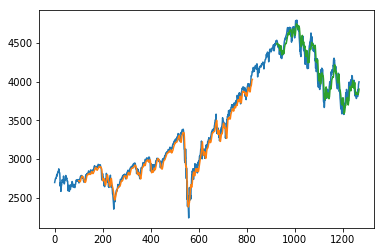

In [27]:
### Plotting
# shift train predict for ploting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
#shift test prediction for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:, :]=np.nan
testPredictPlot[-len(test_predict):]=test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()